Titanic Dataset Exploratory Data Analysis
====

## Step One: Getting familiar with the data.

This page will take a deeper look at the Titanic dataset, which can be found <a href="https://www.kaggle.com/c/titanic/data">here</a>. It is part of the supervised learning challenge on Kaggle. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [6]:
#import training and test data

df_train = pd.read_csv(r"C:\Users\ruban\OneDrive\Documents\GitHub\Kaggle-Titanic-Competition\titanic\train.csv")
df_test = pd.read_csv(r"C:\Users\ruban\OneDrive\Documents\GitHub\Kaggle-Titanic-Competition\titanic\test.csv")


In [10]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


At first glance the data looks to be in pretty good shape. In order to apply any supervised learning to it I'll need to clean the Name and Ticket columns, plus it looks like there are a number of missing values in a few of the columns.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are **179** missing values from Age, **887** missing values from Cabin and **2** missing values from Embarked.
  
We'll have to deal with those missing values as well before running any models. But first we'll take a look at the Target variable and see how many of the passengers survived.

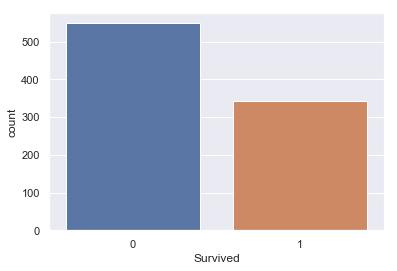

In [20]:
sns.countplot(x='Survived', data=df_train);

The chart shows that more people died than survived. In order to get a baseline on predictions, let's see what the accuracy is on a prediction that everybody died.

In [81]:
df_test['Survived'] = 0;
df_test[['PassengerId', 'Survived']].to_csv(r'C:\Users\ruban\OneDrive\Documents\titanic\test_all_died.csv',index=False);

## Accuracy on test set: 0.62679

This value is broadly in line with the training data split, so let's see if we can get more colour on the difference between those who survived and those who didn't. The easiest thing to look at first is gender.

male      577
female    314
Name: Sex, dtype: int64


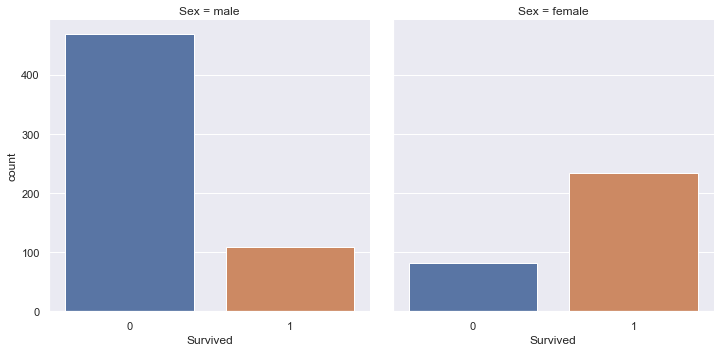

In [26]:
print(df_train['Sex'].value_counts());
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train);

The charts clearly show that a greater proportion of females survived, despite their lower numbers. Let's see if predicting that all females survived improves accuracy.

In [21]:
df_test['Survived'] = df_test['Sex'] == 'female';
df_test['Survived'] = df_test['Survived'].apply(lambda x: int(x))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [84]:
df_test[['PassengerId', 'Survived']].to_csv(r"C:\Users\ruban\OneDrive\Documents\titanic\all_women_s.csv",index=False);

## Accuracy on test set : 0.76555

This improved accuracy by an impressive 14%.

Next let's take a look at passenger class and see how that falls out including gender as the hue. 

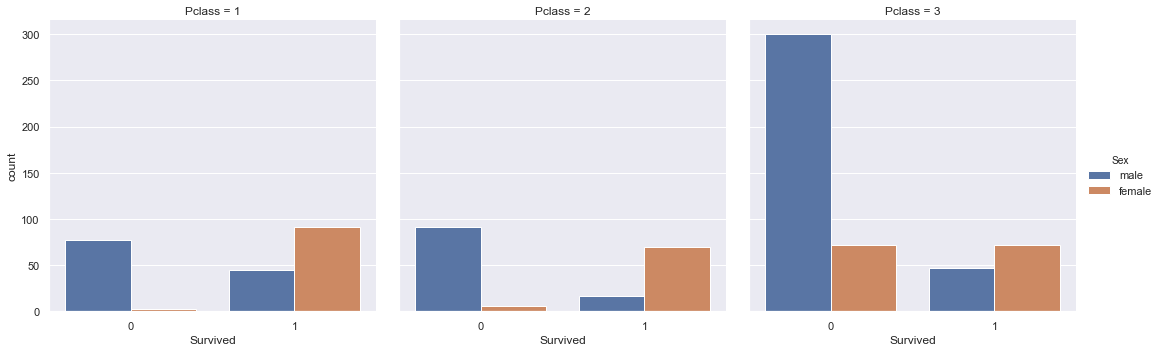

In [27]:
sns.catplot(x='Survived', col='Pclass', hue='Sex', kind='count', data=df_train);

The charts show that more 1st class passengers survived and that more females survived across all classes. There doesn't seem to be much more we can do from this plot to improve predictions so I won't make any adjustments at this point.

Next let's take a look at all the features and see if we can spot any other clear patterns.

C:\Users\ruban\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ruban\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ruban\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ruban\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


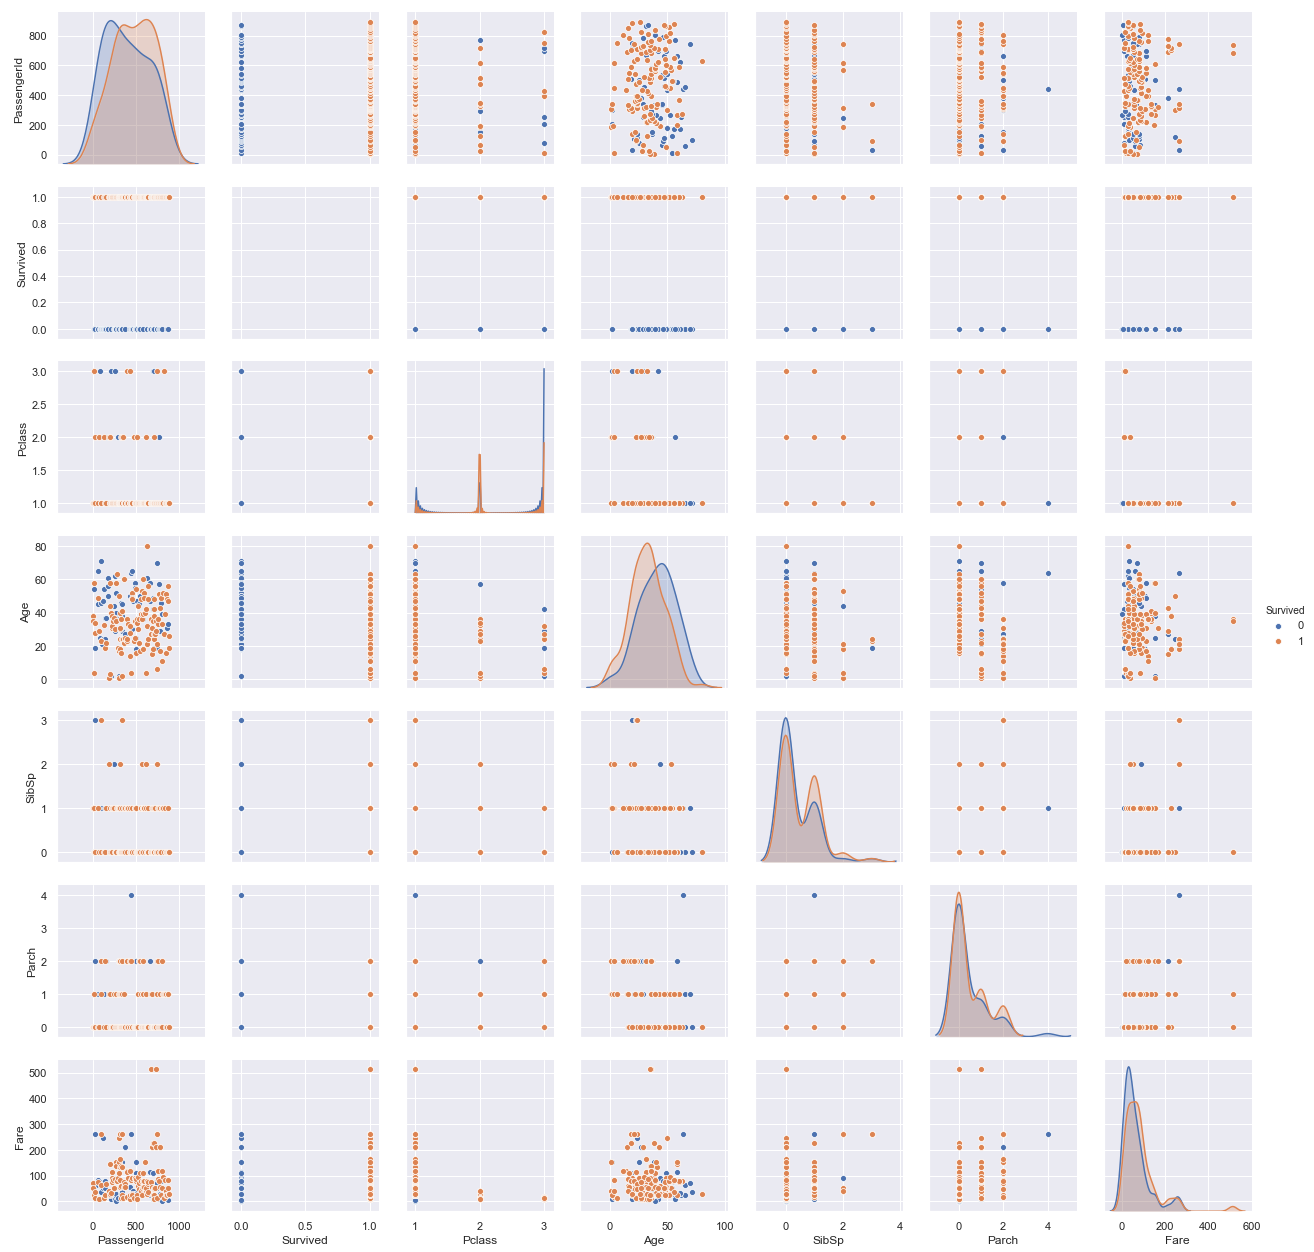

In [28]:
df_train_drop = df_train.dropna()
sns.pairplot(df_train_drop, hue='Survived');